In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


rfc = RandomForestClassifier(n_estimators=50, random_state=42)
## Hold-out Testing
rfc.fit(X_train, y_train)
accuracy_holdout = rfc.score(X_test, y_test)


11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
accuracy_holdout

0.9645

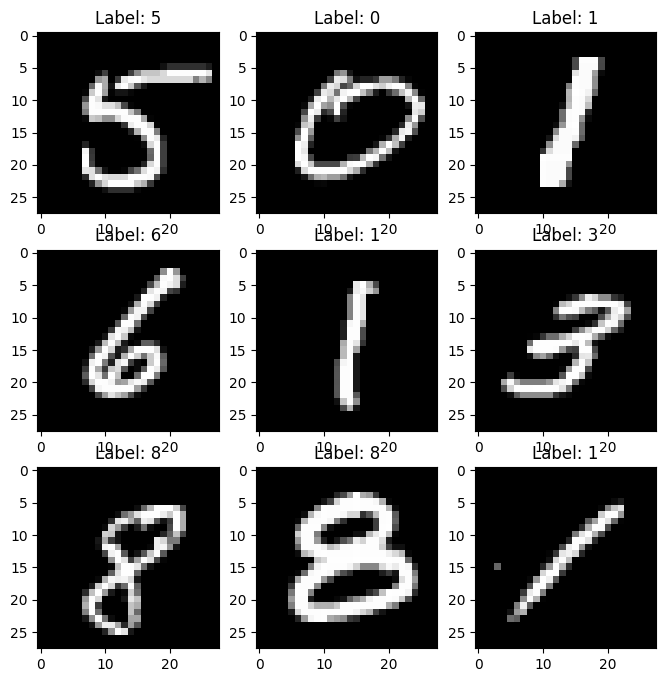

In [ ]:
img = X_train.reshape(X_train.shape[0], 28, 28) / 255.0
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(img[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
plt.show();

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the number of splits
num_splits = 2

# Define the number of epochs
num_epochs = 2

# Initialize the KFold object
kf = KFold(n_splits=num_splits, shuffle=True)

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier()

# Initialize the accuracy list
acc_list = []

# Loop through the splits
for train_index, test_index in kf.split(X_train):
  
  # Split the data into training and testing sets
  X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
  y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
  
  # Fit the model on the training data
  rfc.fit(X_train_kf, y_train_kf)
  
  # Make predictions on the testing data
  y_pred_kf = rfc.predict(X_test_kf)
  
  # Calculate the accuracy score for this split
  acc_kf = accuracy_score(y_test_kf, y_pred_kf)
  
  # Add the accuracy score to the list
  acc_list.append(acc_kf)

# Calculate the mean accuracy score across all splits
accuracy_cv = sum(acc_list)/len(acc_list)

# Print the mean accuracy score
print("Mean accuracy score:", accuracy_cv)


Mean accuracy score: 0.9595625000000001


In [ ]:
accuracy_cv

0.9595625000000001

## Bootstrapping

In [ ]:
n_bootstraps = 2
bootstrapped_scores = []
for i in range(n_bootstraps):
    X_boot, y_boot = resample(X_train, y_train)
    score = rfc.fit(X_boot, y_boot).score(X_test, y_test)
    bootstrapped_scores.append(score)
accuracy_bootstrap = np.mean(bootstrapped_scores)

In [ ]:
accuracy_bootstrap

0.9645

## Visualization

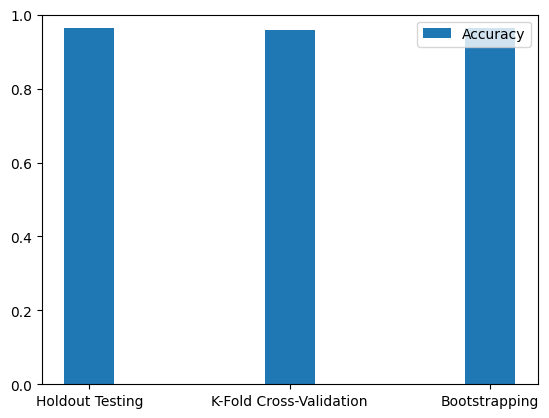

In [ ]:
labels = ['Holdout Testing', 'K-Fold Cross-Validation', 'Bootstrapping']
accuracy_values = [accuracy_holdout, accuracy_cv, accuracy_bootstrap]
fig, ax = plt.subplots()
x = np.arange(len(labels))
width = 0.25
rects1 = ax.bar(x, accuracy_values, width, label='Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0, 1.0])
ax.legend()
plt.show()

In [ ]:
print(f"Accuracy using holdout testing: {accuracy_holdout}")
print(f"Accuracy using k-fold cross-validation: {accuracy_cv}")
print(f"Accuracy using bootstrapping: {accuracy_bootstrap}")

Accuracy using holdout testing: 0.9645
Accuracy using k-fold cross-validation: 0.9595625000000001
Accuracy using bootstrapping: 0.9645
